In [2]:
!pip install transformers

In [3]:
# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast
# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.initializers import TruncatedNormal
#from tensorflow.keras.losses import CategoricalCrossentropy
#from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

# And pandas for data import + sklearn because you allways need sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
MODEL_NAME = 'bert-base-uncased'
DATASET_PATH = '/content/drive/MyDrive/0AccTeam/datasets_consumo/data_testing.csv'

In [7]:
data_test = pd.read_csv(DATASET_PATH)

In [8]:
data_test.head(3)

,texto,food_label,service_label
0,dosas family visiting toronto though food host...,True,True
1,finally \n\na sandwich place mile end serves g...,True,True
2,sad really like bar cool yummy drinks easy rel...,False,True


In [9]:
# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(MODEL_NAME)
config.output_hidden_states = False

In [10]:
# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(MODEL_NAME)
config.output_hidden_states = False
# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = MODEL_NAME, config = config)

In [14]:
# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(MODEL_NAME, config = config)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [15]:
MAX_LENGTH = 100

In [16]:
model = tf.keras.models.load_model('/content/drive/MyDrive/0AccTeam/finalModel.h5')

In [44]:
data_test

,texto,food_label,service_label
0,dosas family visiting toronto though food host...,True,True
1,finally \n\na sandwich place mile end serves g...,True,True
2,sad really like bar cool yummy drinks easy rel...,False,True
3,hype real place transport right italy delicio...,True,True
4,came tuesday night still busy call ahead want ...,True,True
...,...,...,...
19779,lalibela feels like place imagine stumbling st...,True,True
19780,loved place waffle banana nuts salted caramel ...,False,True
19781,zoe kitchen always point always count getting ...,True,False
19782,smaller venue food delicious location durango ...,False,False


In [88]:
# Ready test data
test_y_food = to_categorical(data_test['food_label'])
test_y_service = to_categorical(data_test['service_label'])

test_x = tokenizer(["holla", "que hace"])
# Run evaluation
#model_eval = model.evaluate(
#    x={'input_ids': test_x['input_ids']},
#    y={'food': test_y_food, 'service': test_y_service}
#    )

In [86]:
prediction = model.predict(test_x['input_ids'][0])

In [87]:
prediction["food"]

array([[ 0.87256515, -1.2227037 ],
       [ 1.5700461 , -1.8944784 ],
       [ 0.9014725 , -1.2704508 ],
       [ 0.88184077, -1.2373896 ]], dtype=float32)

In [63]:
prediction["service"][:, 1]

array([-0.29094982, -2.7807057 , -0.29965058, -0.30816957, -1.0564933 ,
       -0.29401973, -0.33038694, -0.70191175,  0.39838547, -0.96416587,
       -2.4422743 , -2.2278059 , -0.29175633, -0.9083666 , -2.257439  ,
       -0.41190892, -0.31557631, -2.4422743 , -0.3032146 , -2.6709828 ,
       -0.28706372, -2.6798437 , -2.2569664 , -0.70191175, -1.4734321 ,
       -0.30816957,  0.49815497, -2.2905905 , -0.29480255, -0.3451061 ,
       -0.30421567, -2.4736326 , -2.1369376 , -0.36999273, -1.2395955 ,
       -2.7807019 , -0.30331182, -1.3285028 , -0.36200196, -0.31073076,
       -0.31937543, -1.7048589 , -0.31377286, -0.2908729 , -0.3111353 ,
       -0.3037147 , -1.2757797 , -0.31013352], dtype=float32)

In [64]:
prediction

{'food': array([[ 0.8725641 , -1.2227029 ],
        [ 2.7815945 , -3.12503   ],
        [ 0.875789  , -1.2273746 ],
        [ 0.8799261 , -1.2398115 ],
        [ 3.3553092 , -3.6312678 ],
        [ 0.8785967 , -1.2548866 ],
        [ 0.9125871 , -1.2845328 ],
        [ 0.24725391, -0.2849065 ],
        [ 2.7335923 , -3.0557883 ],
        [ 3.3205712 , -3.6823945 ],
        [ 3.2928717 , -3.6026855 ],
        [ 2.4819205 , -3.0580916 ],
        [ 2.065909  , -2.4530766 ],
        [ 2.5603216 , -3.0679972 ],
        [ 2.379364  , -2.7482545 ],
        [ 1.1331797 , -1.5695579 ],
        [ 0.88498336, -1.2427617 ],
        [ 3.2928717 , -3.6026855 ],
        [ 0.8721679 , -1.2327882 ],
        [ 1.9933722 , -2.3470218 ],
        [ 0.9653132 , -1.3404241 ],
        [ 1.3528986 , -1.7486131 ],
        [ 1.5403967 , -2.1934316 ],
        [ 0.24725391, -0.2849065 ],
        [ 3.3528318 , -3.684831  ],
        [ 0.8799261 , -1.2398115 ],
        [ 0.7900682 , -1.0008421 ],
        [ 2.829142  

False

In [ ]:
prediction["food"][:, 1]

In [ ]:
import numpy as np
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix,roc_curve,plot_roc_curve,auc

In [ ]:
print("SERVICE")
print("Recall:", recall_score((np.array(data_test.service_label) == 1) ,(prediction["service"][:, 1]> 0)) )
print("Accuracy:", accuracy_score((np.array(data_test.service_label) == 1) ,(prediction["service"][:, 1]> 0)))
print("Precision:",precision_score((np.array(data_test.service_label) == 1) ,(prediction["service"][:, 1]> 0)))


print("\nFOOD")
print("Recall:", recall_score((np.array(data_test.food_label) == 1) ,(prediction["food"][:, 1]> 0)) )
print("Accuracy:", accuracy_score((np.array(data_test.food_label) == 1) ,(prediction["food"][:, 1]> 0)))
print("Precision:",precision_score((np.array(data_test.food_label) == 1) ,(prediction["food"][:, 1]> 0)))


SERVICE
Recall: 0.9672209404089427
Accuracy: 0.9303983016579054
Precision: 0.9264593811918915

FOOD
Recall: 0.9769626260628831
Accuracy: 0.918772745653053
Precision: 0.8779209240337628


In [ ]:
print("Confusion Maxtrix Food:",confusion_matrix((np.array(data_test.service_label) == 1) ,(prediction["food"][:, 1]> 0)))


Confusion Maxtrix Food: [[4758 2457]
 [3771 8798]]


In [ ]:
print("Recall:", recall_score((np.array(data_test.food_label) == 1) ,(prediction["food"][:, 1]> 0)) )


Recall: 0.9769626260628831


In [ ]:
fpr, tpr, _ = roc_curve((np.array(data_test.service_label) == 1) ,(prediction["food"][:, 1]> 0))


In [ ]:
roc_auc = auc(fpr, tpr)

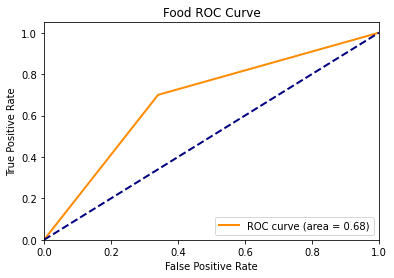

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Food ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
fpr, tpr, _ = roc_curve((np.array(data_test.service_label) == 1) ,(prediction["service"][:, 1]> 0))


In [ ]:
roc_auc = auc(fpr, tpr)

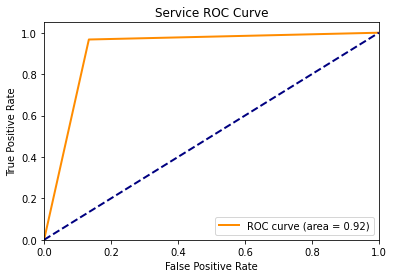

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Service ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predict.py
get_prediction_from_review("Hola que hace") => 
{
    "categories": ["food", "service"], 
    "label": [0,1],
    "score": []
}

get_prediction_from_reviews() =>
{
    {
      label: "food", 
     scores: [...........]
     }
 

}

In [ ]:
test_x

{'input_ids': <tf.Tensor: shape=(800, 100), dtype=int32, numpy=
array([[  101,  2156,  9781, ...,     0,     0,     0],
       [  101,  2034, 24113, ...,     0,     0,     0],
       [  101,  2833,  3737, ..., 15530,  2050,   102],
       ...,
       [  101,  4326,  2089, ...,     0,     0,     0],
       [  101, 10166,  2833, ...,     0,     0,     0],
       [  101, 20130,  2180, ...,     0,     0,     0]], dtype=int32)>}

In [ ]:
(800,100)

In [ ]:
800

In [ ]:
mmodel.predict?

In [ ]:
dir(mmodel)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compile_was_called',
 '_compiled_tr

In [ ]:
# Build your model input
input_ids = Input(shape=(MAX_LENGTH,), name='input_ids', dtype='int32')
inputs = {'input_ids': input_ids}

In [ ]:
data_test

In [ ]:
model.predict(tokenizer(data_test.head(1).texto[84136])['input_ids'])

{'food': array([[-1.0027444 ,  1.3756535 ],
        [-2.0007913 ,  2.2804306 ],
        [ 0.9007703 , -1.7199993 ],
        [-0.44014966,  0.4979013 ],
        [ 1.304857  , -2.6473973 ],
        [ 0.77446085, -0.7249743 ],
        [-2.4238536 ,  3.077812  ],
        [-2.256075  ,  2.9820921 ],
        [-0.5240514 ,  0.55314934],
        [ 1.0257418 , -2.1086586 ],
        [ 0.53670555, -0.88267183],
        [-0.90801835,  0.66581964],
        [-0.6755008 ,  1.0224655 ],
        [-0.6001115 ,  0.17356433],
        [-1.813535  ,  2.3328545 ],
        [ 1.2473954 , -2.3115184 ],
        [-0.5027427 ,  0.71581525],
        [ 1.3010515 , -1.8333834 ],
        [ 0.8270092 , -1.6019491 ],
        [-2.0007913 ,  2.2804306 ],
        [ 0.505589  , -1.4594243 ],
        [ 1.750716  , -2.7780871 ],
        [ 2.936838  , -3.872943  ],
        [-1.4070625 ,  1.4148613 ],
        [-2.6108105 ,  3.249318  ],
        [ 1.8868281 , -2.3234823 ],
        [ 0.11129823, -1.013092  ],
        [ 0.8987831 

In [ ]:
data_test.head(1).texto[84136]

'food absolutely scrumptious  service received outstanding  becca server adam brandon management everyone friendly informative food wine pistachio dessert die  definitely back'

In [ ]:
predictionDf = pd.DataFrame({"text": data_test["texto"],"food_score": prediction["food"][:,1],"service_score":prediction["service"][:,1]})

In [ ]:
predictionDf["food_label"] = predictionDf["food_score"]>0

In [ ]:
predictionDf["service_label"] = predictionDf["service_score"]>0

In [ ]:
predictionDf.iloc[1350]

text             ordered frozen lemonade got frozen lemonade si...
food_score                                                -4.58894
service_score                                              -2.8012
food_label                                                   False
service_label                                                False
Name: 1350, dtype: object

In [ ]:
predictionDf.to_csv('/content/drive/MyDrive/0AccTeam/results/results_prediction.csv',index=False)